# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"

lat1 = []
lon1 = []
temp1_max = []
humidity1 = []
cloudity1 = []
wind_speed1 = []
country1 = []
date1 = []
city1 = []

print ('Beginning Data Retrieval')     
print ('-----------------------------')

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        temp_max = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudity = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
    
        city1.append(city)
        lat1.append(lat)
        lon1.append(lon)
        temp1_max.append(temp_max)
        humidity1.append(humidity)
        cloudity1.append(cloudity)
        wind_speed1.append(wind_speed)
        country1.append(country)
        date1.append(date)
    
        print(f"{city}found!")
    
        time.sleep(1)
    
    except:
        print('City not found. Skipping...')

print ( "-----------------------------")
print ("Data Retrieval Complete")      
print ("-----------------------------")  



# Processing Record 1 of Set 1 | butaritari


Beginning Data Retrieval
-----------------------------
ushtobefound!
City not found. Skipping...
barrowfound!
punta arenasfound!
mahinafound!
broken hillfound!
mataurafound!
puerto ayorafound!
phraefound!
kununurrafound!
ushuaiafound!
coquimbofound!
arraial do cabofound!
husavikfound!
City not found. Skipping...
komsomolskiyfound!
rikiteafound!
bethelfound!
georgetownfound!
taksimofound!
new norfolkfound!
santa rosaliafound!
blufffound!
City not found. Skipping...
kachugfound!
odweynefound!
vainifound!
ponta do solfound!
haines junctionfound!
fayafound!
tasiilaqfound!
qaanaaqfound!
esperancefound!
albanyfound!
hilofound!
yamoussoukrofound!
geraldtonfound!
sayyanfound!
tonantinsfound!
jamestownfound!
tatarskaya kargalafound!
City not found. Skipping...
nikolskoyefound!
yellowknifefound!
belyy yarfound!
cidreirafound!
berbestifound!
atarfound!
clyde riverfound!
seoulfound!
cortezfound!
evanstonfound!
dinglefound!
noumeafound!
nemurofound!
lhokseumawefound!
sorlandfound!
airaifound!
busse

brezicefound!
purifound!
ballinafound!
haapitifound!
nyurbafound!
sinnamaryfound!
aripuanafound!
iracoubofound!
aklavikfound!
ternatefound!
pesochnoyefound!
turukhanskfound!
lujanfound!
mogzonfound!
el molinofound!
luderitzfound!
itomanfound!
altamirafound!
City not found. Skipping...
lavrentiyafound!
guerrero negrofound!
fort nelsonfound!
pangodyfound!
northamfound!
adrarfound!
City not found. Skipping...
lebedynfound!
panabafound!
brawleyfound!
amgafound!
pennadamfound!
alihefound!
City not found. Skipping...
saltafound!
bakanifound!
qeshmfound!
kungurtugfound!
flindersfound!
estellefound!
marystownfound!
kalispellfound!
liparifound!
ust-tsilmafound!
show lowfound!
krasnoborskfound!
cabedelofound!
linharesfound!
kasempafound!
port macquariefound!
nomefound!
sardarshahrfound!
sioux lookoutfound!
warner robinsfound!
lubaofound!
margatefound!
paamiutfound!
dolinskfound!
centralinafound!
khandbarifound!
marsh harbourfound!
taboao da serrafound!
parabelfound!
beinamarfound!
kashifound!
co

In [4]:
weather_df = pd.DataFrame(
{"City": city1,
 "Lat": lat1,
 "Lng": lon1,
 "Max Temp": temp1_max,
 "Humidity": humidity1,
 "Cloudiness": cloudity1,
 "Wind Speed": wind_speed1,
 "Country": country1,
 "Date": date1})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushtobe,45.2514,77.9838,270.83,98,100,7.00,KZ,1612841901
1,barrow,71.2906,-156.7887,236.15,84,1,4.63,US,1612841902
2,punta arenas,-53.1500,-70.9167,286.15,76,0,2.57,CL,1612841904
3,mahina,-17.5065,-149.4890,302.15,65,20,1.54,PF,1612841905
4,broken hill,-31.9500,141.4333,302.15,14,0,5.14,AU,1612841906
...,...,...,...,...,...,...,...,...,...
539,parabel,58.6978,81.4825,258.63,94,92,4.82,RU,1612842532
540,beinamar,8.6698,15.3813,291.02,24,98,0.83,TD,1612842534
541,kashi,39.4547,75.9797,275.15,48,40,2.00,CN,1612842535
542,correntina,-13.3433,-44.6367,293.73,85,74,0.65,BR,1612842536


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv('cities.csv', encoding='utf-8')

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushtobe,45.2514,77.9838,270.83,98,100,7.00,KZ,1612841901
1,barrow,71.2906,-156.7887,236.15,84,1,4.63,US,1612841902
2,punta arenas,-53.1500,-70.9167,286.15,76,0,2.57,CL,1612841904
3,mahina,-17.5065,-149.4890,302.15,65,20,1.54,PF,1612841905
4,broken hill,-31.9500,141.4333,302.15,14,0,5.14,AU,1612841906


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.593089,17.785390,283.098051,73.108456,55.988971,3.559228,1.612842e+09
std,32.615234,89.468520,17.334499,19.789528,39.558753,2.623251,2.146484e+02
min,-54.800000,-175.200000,232.150000,3.000000,0.000000,0.170000,1.612841e+09
25%,-7.081250,-59.650000,270.927500,63.000000,13.750000,1.540000,1.612842e+09
50%,22.426100,20.395100,289.125000,78.000000,74.500000,2.970000,1.612842e+09
75%,46.216000,93.720825,296.647500,88.000000,94.000000,4.852500,1.612842e+09
max,78.218600,178.416700,310.150000,100.000000,100.000000,16.460000,1.612843e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.
humidity_100_df = weather_df.loc[weather_df["Humidity"] > 100, :]
humidity_100_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace=False)
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushtobe,45.2514,77.9838,270.83,98,100,7.00,KZ,1612841901
1,barrow,71.2906,-156.7887,236.15,84,1,4.63,US,1612841902
2,punta arenas,-53.1500,-70.9167,286.15,76,0,2.57,CL,1612841904
3,mahina,-17.5065,-149.4890,302.15,65,20,1.54,PF,1612841905
4,broken hill,-31.9500,141.4333,302.15,14,0,5.14,AU,1612841906
...,...,...,...,...,...,...,...,...,...
539,parabel,58.6978,81.4825,258.63,94,92,4.82,RU,1612842532
540,beinamar,8.6698,15.3813,291.02,24,98,0.83,TD,1612842534
541,kashi,39.4547,75.9797,275.15,48,40,2.00,CN,1612842535
542,correntina,-13.3433,-44.6367,293.73,85,74,0.65,BR,1612842536


In [17]:
clean_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.593089,17.785390,283.098051,73.108456,55.988971,3.559228,1.612842e+09
std,32.615234,89.468520,17.334499,19.789528,39.558753,2.623251,2.146484e+02
min,-54.800000,-175.200000,232.150000,3.000000,0.000000,0.170000,1.612841e+09
25%,-7.081250,-59.650000,270.927500,63.000000,13.750000,1.540000,1.612842e+09
50%,22.426100,20.395100,289.125000,78.000000,74.500000,2.970000,1.612842e+09
75%,46.216000,93.720825,296.647500,88.000000,94.000000,4.852500,1.612842e+09
max,78.218600,178.416700,310.150000,100.000000,100.000000,16.460000,1.612843e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [24]:
latitude_and_temperature = clean_weather_df[['Lat', 'Max Temp']]
latitude_and_temperature

,Lat,Max Temp
0,45.2514,270.83
1,71.2906,236.15
2,-53.1500,286.15
3,-17.5065,302.15
4,-31.9500,302.15
...,...,...
539,58.6978,258.63
540,8.6698,291.02
541,39.4547,275.15
542,-13.3433,293.73


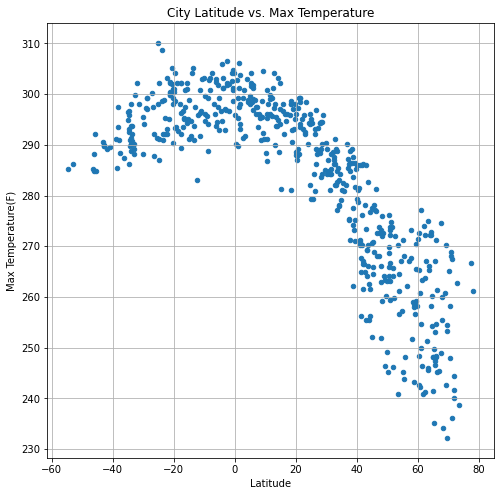

In [27]:
latitude_and_temperature.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

In [28]:
latitude_and_humidity = clean_weather_df[['Lat', 'Humidity']]
latitude_and_humidity

,Lat,Humidity
0,45.2514,98
1,71.2906,84
2,-53.1500,76
3,-17.5065,65
4,-31.9500,14
...,...,...
539,58.6978,94
540,8.6698,24
541,39.4547,48
542,-13.3433,85


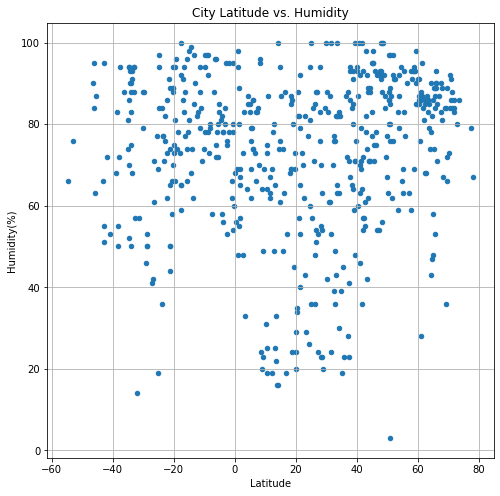

In [29]:
latitude_and_humidity.plot(kind = "scatter", x = "Lat", y = "Humidity", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

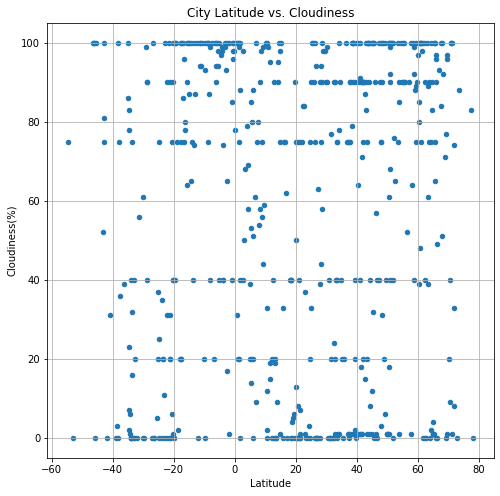

In [30]:
latitude_and_cloudiness = clean_weather_df[['Lat', 'Cloudiness']]
latitude_and_cloudiness
latitude_and_cloudiness.plot(kind = "scatter", x = "Lat", y = "Cloudiness", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

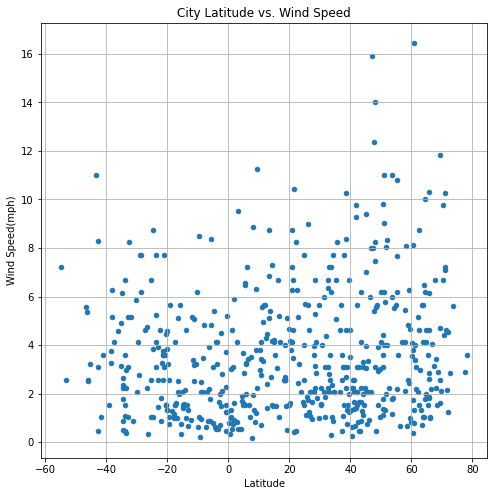

In [31]:
latitude_and_wind_speed = clean_weather_df[['Lat', 'Wind Speed']]
latitude_and_wind_speed
latitude_and_wind_speed.plot(kind = "scatter", x = "Lat", y = "Wind Speed", grid = True, figsize = (8,8))
plt.title ("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression